In [21]:
print("Hello World.")

Hello World.


In [22]:
#California Housing Data Set 
import os
import pandas as pd
HOUSING_DATA = "/media/ashish-kumar-singh/Seagate Backup Plus Drive/ML/datasets/"

def load_housing_data():
    csv_path = os.path.join(HOUSING_DATA, 'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [24]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


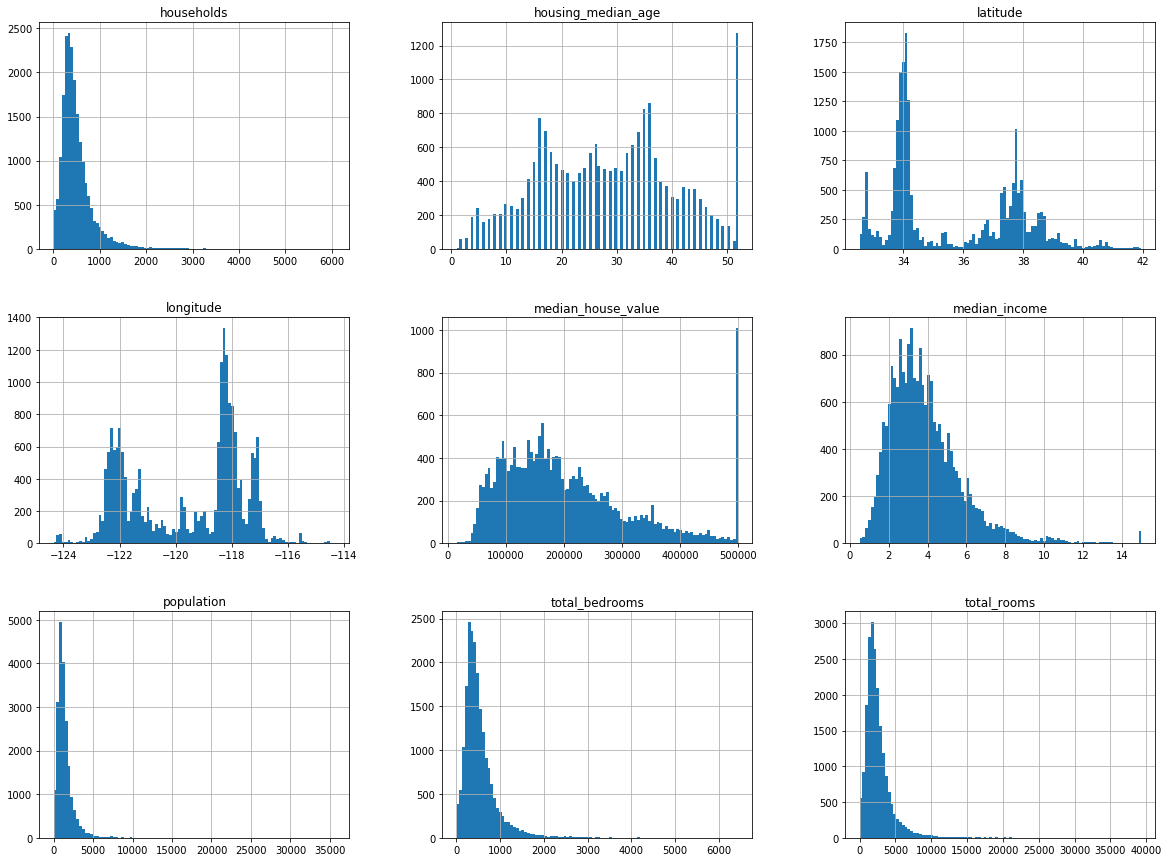

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 100 , figsize =(20,15))
plt.show()

In [27]:
#Suppose you chatted with experts who told you that the median income is a very important attribute to
#predict median housing prices. You may want to ensure that the test set is representative of the various
#categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute,
#you first need to create an income category attribute.
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [28]:
#Divide the data in parts. Test set and Training set.
#Make sure the ratios are maintained during the split and the training set is representative of the whole dataset. 
#This is also known as Stratified Sampling.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
#remove income_cat column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

 ## Visualization

In [30]:
#lets create a copy of the stratified training set
housing = strat_train_set.copy()

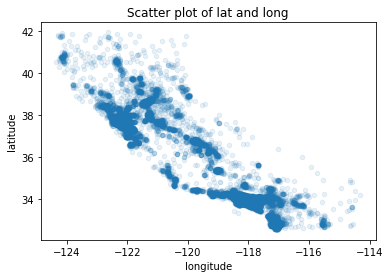

In [31]:
#plot the scatterplot on lat and long
#alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points
housing.plot(kind = "scatter", x = "longitude" , y = "latitude", title = "Scatter plot of lat and long",alpha = 0.1)

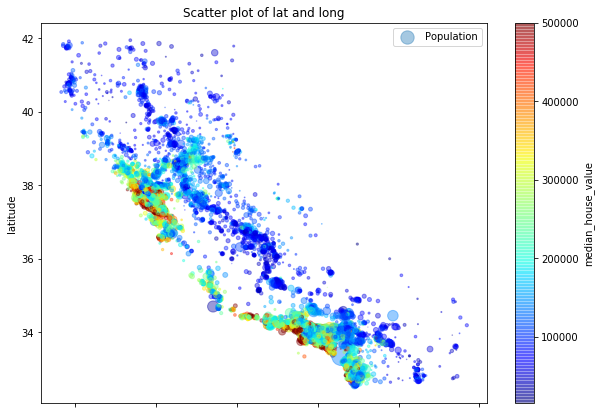

In [32]:
#Visualize in a better manner via jet plot
housing.plot(kind = "scatter", x = "longitude" , y = "latitude", title = "Scatter plot of lat and long",alpha = 0.4, s = housing["population"]/100, c = "median_house_value", label = "Population", cmap = plt.get_cmap("jet"), colorbar = True, figsize = (10,7))
plt.legend()

In [33]:
#Find correlation : standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method
corr_matrix = housing.corr()

# Correlation
Now check how much each attribute correlates with median house value
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong
positive correlation; for example, the median house value tends to go up when the median income goes up.
When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a
small negative correlation between the latitude and the median house value (i.e., prices have a slight
tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear
correlation. The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”).

In [34]:
corr_matrix["median_house_value"].sort_values(ascending = False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31846ae748>,
      dtype=object)

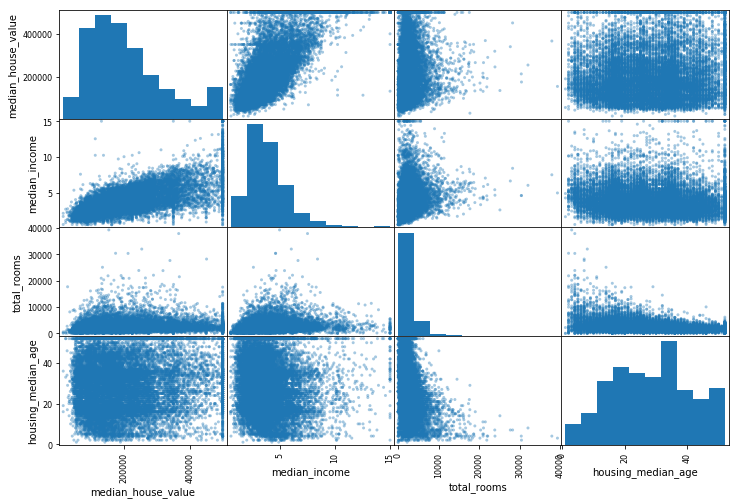

In [35]:
## Correlation Graph
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), alpha =0.4)

## Prepare the data for machine learning process. 
Clean the data, get rid of null values, reduce the number of features.
Join some features into one. (Dimensionality Reduction)

In [36]:
#Dropping the labels as labels are not to be cleaned or touched. Copying the labels to another variable.
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [37]:
#Imputer for taking care of na values even in case of new data.
from sklearn.preprocessing import Imputer
impu = Imputer(strategy="median")
#Since the median can only be computed on numerical attributes, we need to create a copy of the data
#without the text attribute ocean_proximity :
housing_num = housing.drop("ocean_proximity", axis=1)
impu.fit(housing_num)
X = impu.transform(housing_num)
#transform the numpy array obtained in the last step to pandas dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

## Handling Text and Categorical Attributes
Converting the text attributes in numerical form.


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


One issue with this representation is that ML algorithms will assume that two nearby values are more
similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more
similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per
category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another
attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called # one-hot
encoding.

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohenc = OneHotEncoder()
housing_cat_1hot = ohenc.fit_transform(housing_cat_encoded.reshape(-1, 1))

We can apply both transformations (from text categories to integer categories, then from integer categories
to one-hot vectors) in one shot using the LabelBinarizer class

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

## Hyperparameter and Transformers.
In this example the transformer has one hyperparameter, add_bedrooms_per_room , set to True by default
(it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out
whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a
hyperparameter to gate any data preparation step that you are not 100% sure about. The more you
automate these data preparation steps, the more combinations you can automatically try out, making it
much more likely that you will find a great combination (and saving you a lot of time).

To create a Transformed in Scikit Learn, all you need is to create a class and implement three methods: fit() (returning self ), transform() , and fit_transform() . You can get the last one for free by simply adding
TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args
and **kargs** in your constructor) you will get two extra methods ( get_params() and set_params() )
that will be useful for automatic hyperparameter tuning.

In [43]:
#Create a customized Transformer to combine some columns
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling
One of the most important transformations you need to apply to your data is feature scaling. With few
exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have
very different scales. This is the case for the housing data: the total number of rooms ranges from about 6
to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is
generally not required.
There are two common ways to get all attributes to have the same scale: min-max scaling and
standardization.
## Min-max scaling (normalization):
values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this.
## Standardization
first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0– 0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called **StandardScaler** for standardization.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [52]:
from sklearn.preprocessing import LabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return LabelBinarizer().fit(X).transform(X)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', CustomBinarizer()),
])

In [53]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [54]:
housing_prepared = full_pipeline.fit_transform(housing)

## Training and Evaluating on the Training Set


In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_mse)

4709829587.97112


In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

DecisionTree is overfitting while there is high error in LinearRegression which is underfitting.
**K-fold cross-validation**: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and
training on the other 9 folds. The result is an array containing the 10 evaluation scores

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70805.99217328 66371.43176399 71069.43393449 69950.49967402
 70286.47708466 73317.52089824 70678.86339543 71949.99109084
 76427.07980238 69831.40608548]
Mean: 71068.8695902809
Standard deviation: 2454.0693047958084


In [60]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


**Random Forests** work by training many Decision Trees on random subsets of the features, then averaging out their
predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a
great way to push ML algorithms even further.


In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [51541.47989441 49893.34821101 54033.69827317 53341.11365099
 51436.86243252 55581.77690167 50605.01065395 50627.96002516
 55597.66113256 52903.90198358]
Mean: 52556.28131590205
Standard deviation: 1955.0752158483401


Note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. However, before you dive much deeper in Random Forests, you should try out many other models from various categories of Machine Learning algorithms (several Support Vector
Machines with different kernels, possibly a neural network, etc.), without spending too much time
tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

You should save every model you experiment with, so you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle module, or using sklearn.externals.joblib , which is more efficient at serializing large NumPy arrays.